# 선형 모델 (linear model)

In [2]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


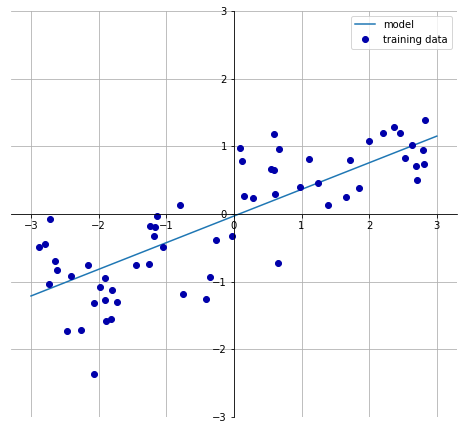

In [3]:
mglearn.plots.plot_linear_regression_wave()

회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개 일땐 평면이 되며, 더 높은 차원에서는 초평면(hyperplane)이 되는 회귀 모델의 특징을 가짐

# 선형 회귀(최소제곱법)

linear regression or OLS; ordinary least squares는 가장 간단하고 오래된 회귀용 선형 알고리즘

선형회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차(mean squared error)을 최소화하는 파라미터 w와 b를 찾음

#### 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없음

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)
lr = LinearRegression().fit(X_train, y_train)

기울기 파라미터(w)는 가중치(weight) or 계수(codfficient)라고 하며 lr 객체의 coef_ 속성에 저장되어 있고

편향(offset) or 절편(intercept) 파라미터(b)는 intercept_ 속성에 저장되어 있음

In [5]:
print('lr.coef_ : {}'.format(lr.coef_))
print('lr.intercept_ : {}'.format(lr.intercept_))

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


intercept_ 속성은 항상 실수 값 하나지만, coef_ 속성은 각 입력 특성에 하나씩 대응되는 NumPy 배열임

In [6]:
print('trainset score : {:.2f}'.format(lr.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lr.score(X_test, y_test)))

trainset score : 0.67
testset score : 0.66


R^2 값이 0.66인 것은 좋은 결과는 아니지만 두 세트의 점수가 매우 비슷한 것을 확인
이는 과대적합이 아닌 과소적합인 상태를 의미

1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합을 걱정할 필요가 없으나 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높음

In [7]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
def lrscore():
    print('trainset score : {:.2f}'.format(lr.score(X_train, y_train)))
    print('testset score : {:.2f}'.format(lr.score(X_test, y_test)))
lrscore()

trainset score : 0.95
testset score : 0.61


위의 결과는 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 함

#### 기본 선형회귀 방식 대신 가장 널리 쓰이는 모델인 릿지 회귀

### 과대적합(overfitting)
- 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것

### 과소적합(underfitting)
- 너무 간단한 모델이 선택되는 것

# 릿지 회귀(Ridge Regression)

릿지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다. 가중치의 절대값을 가능한 한 작게 만드는 것이다. 다시 말해 w의 모든 원소가 0에 가깝게 되도록 하는 것

직관적으로 생각하면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만듦(기울기를 작게)

#### 이런 제약을 규제(regularization)라고 함.
규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
릿지 회귀에서 사용하는 규제 방식을 L2 규제라고 함

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
def ridgescore():
    print('trainset score : {:.2f}'.format(ridge.score(X_train, y_train)))
    print('testset score : {:.2f}'.format(ridge.score(X_test, y_test)))
ridgescore()

trainset score : 0.89
testset score : 0.75


In [9]:
lrscore()
print('-----')
ridgescore()

print("\n모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 됨")

trainset score : 0.95
testset score : 0.61
-----
trainset score : 0.89
testset score : 0.75

모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 됨


alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화활지를 지정할 수 있음.  alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있음


In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
def ridge10score():
    print('trainset score : {:.2f}'.format(ridge10.score(X_train, y_train)))
    print('testset score : {:.2f}'.format(ridge10.score(X_test, y_test)))
ridge10score()

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
def ridge01score():
    print('trainset score : {:.2f}'.format(ridge01.score(X_train, y_train)))
    print('teatset score : {:.2f}'.format(ridge01.score(X_test, y_test)))
ridge01score()

trainset score : 0.79
testset score : 0.64
trainset score : 0.93
teatset score : 0.77


In [11]:
lrscore()
print('---')
ridgescore()
print('---')
ridge10score()
print('---')
ridge01score()

print('\n테스트 세트에 대한 성능이 높아질 때까지 alpha 값을 줄일 수 있을 것임')

trainset score : 0.95
testset score : 0.61
---
trainset score : 0.89
testset score : 0.75
---
trainset score : 0.79
testset score : 0.64
---
trainset score : 0.93
teatset score : 0.77

테스트 세트에 대한 성능이 높아질 때까지 alpha 값을 줄일 수 있을 것임


높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_의 절댓값 크기가 작을 것이라고 예상할 수 잇음


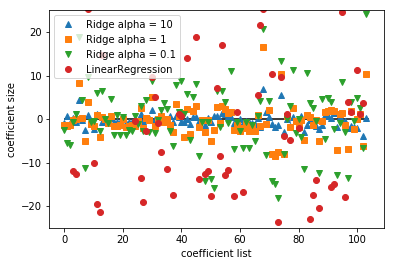

In [12]:
print('높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_의 절댓값 크기가 작을 것이라고 예상할 수 잇음')

plt.plot(ridge10.coef_, '^', label = 'Ridge alpha = 10')
plt.plot(ridge.coef_, 's', label='Ridge alpha = 1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha = 0.1')

plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.xlabel('coefficient list')
plt.ylabel('coefficient size')
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

#### regulaization의 효과를 이해하는 또 다른 방법은 alpha 값을 fix하고 훈련 데이터의 크기를 변화시켜 보는 것

### 학습곡선(learning curve)
데이터 셋의 크기에 따른 모델의 성능 변화 혹은 훈련 과정을 여러 번 반복하면서 학습하는 알고리즘에선 반복의 횟수에 따른 성능 변화를 나타내는 그래프


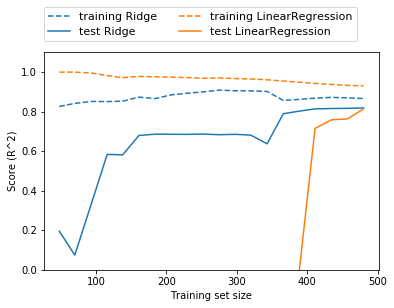

In [13]:
mglearn.plots.plot_ridge_n_samples()

릿지에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮음. 그러나 테스트 데이터에서는 릿지의 점수가 더 높으며 특별히 작은 데이터셋에서는 더 그러함.

#### 데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아질 것이라는 점을 알 수 있음.
또 하나의 흥미로운 점은 선형 회귀의 훈련 데이터 성능이 감소한다는 것. 이는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문

# 라쏘(Lasso)

lasso의 규제 방식은 L1규제라고 하며 (Ridge - L2규제) Ridge와 다르게 어떤 계수는 정말로 0이 된다. 어떻게 보면 특성 선택(feature selection)이 자동으로 이뤄진다고 볼 수 있다. 일부 규제를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러난다.

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso.score(X_test, y_test)))
print('number of attributes used : {}'.format(np.sum(lasso.coef_ != 0)))

trainset score : 0.29
testset score : 0.21
number of attributes used : 4


위의 결과는 과소적합이며 105개의 특성 중 4개만 사용한 것임

Ridge에서와 마찬가지로 Lasso도 계수를 얼마나 강하게 0으로 보낼지를 조절하는 alpha 매개변수를 지원

과소적합을 줄이기 위해서 alpha 값을 줄여보겠음. 이렇게 하려면 mas_iter(반복 실행 최대횟수)의 기본값을 늘려야 함

In [15]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso001.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso001.score(X_test, y_test)))
print('number of attributes used : {}'.format(np.sum(lasso001.coef_ != 0)))

trainset score : 0.90
testset score : 0.77
number of attributes used : 33


모델의 복잡도는 증가하여 훈련세트와 테스트세트에서의 성능이 좋아짐. 성능은 Ridge보다 조금 나은데 특성 105개 중 33개 특성만 사용했기 때문에 모델을 분석하기가 조금 더 쉬움

그러나 alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해짐

In [16]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('trainset score : {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('testset score : {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('number of attributes used : {}'.format(np.sum(lasso00001.coef_ != 0)))

trainset score : 0.95
testset score : 0.64
number of attributes used : 94


In [17]:
lrscore()

trainset score : 0.95
testset score : 0.61


Text(0,0.5,'coef size')

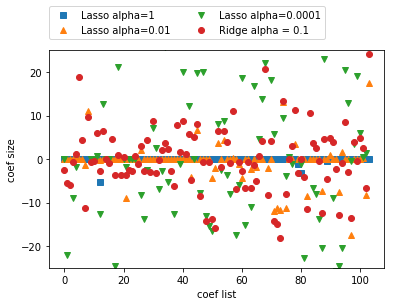

In [18]:
plt.plot(lasso.coef_, 's', label = 'Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label = 'Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label = 'Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label = 'Ridge alpha = 0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel('coef list')
plt.ylabel('coef size')

alpha=0.1 인 Ridge 모델은 alpha=0.01인 라쏘 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않습니다.
특성이 출력에 주는 영향 최소화

실제로는 보통 릿지 회귀를 선호하지만, 특성이 많고 그중 일부분만 중요하다면 Lasso가 더 좋을 수 있음. 또한 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있음.

# 분류용 선형 모델
회귀용 선형 모델에서는 출력 y^가 특성의 선형 함수였음(즉 직선, 평면, 초평면임)

분류용 선형 모델에서는 결정 경계가 입력의 선형 함수임 - 다른 말로 하면 (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기임

### 선형 분류 알고리즘
#### 1. 로지스틱 회귀 ( logistic regression )
 - ! 주의 : regression이 들어가지만 회귀 알고리즘이 아니라 분류 알고리즘이므로 LinearRegression과 혼동하면 안 됨.
 
#### 2. 서포트 벡터 머신 ( SVM ; Support Vector Machine )


C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


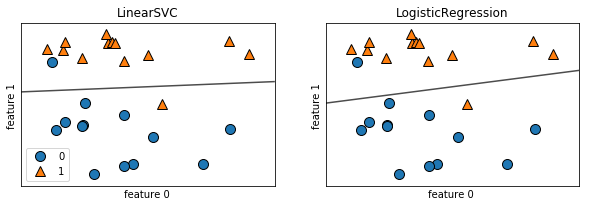

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('feature 0 ')
    ax.set_ylabel('feature 1 ')
axes[0].legend()

LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C임.  C의 값이 높아지면 규제가 감소.

#### 다시 말해 매개변수로 높은 C 값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려 하고, 반면에 C 값을 낮추면 모델은  계수 벡터(w)가 0에 가까워지도록 만듦.


매개변수 C의 작동 방식을 다르게 설명할 수도 있음.

알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확히 분류하려고 노력할 것임

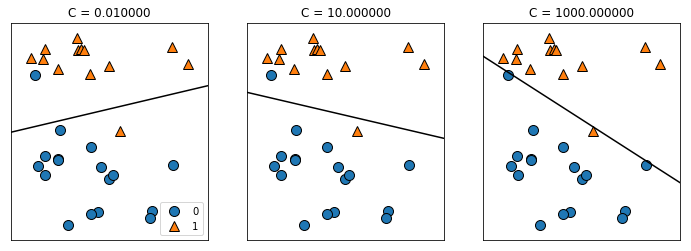

In [20]:
mglearn.plots.plot_linear_svc_regularization()

규제가 강해진 모델은 비교적 수평에 가까운 결정경계를 만듦

가장 오른쪽 그림은 C 값을 아주 크게 하였더니 결정 경계는 더 기울었고 마침내 클래스 0의 모든 데이터 포인트를 올바로 분류했음


#### 회귀와 비슷하게 분류에서의 선형 모델은 제한적으로 보이나 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요해짐

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print("trainset score : {:.3f}".format(logreg.score(X_train, y_train)))
print("testset score : {:.3f}".format(logreg.score(X_test, y_test)))


trainset score : 0.955
testset score : 0.958


In [22]:
# 훈련, 테스트 세트의 성능이 매우 비슷하므로 과소적합인 것으로 보임 -> 제약을 풀어주기 위해 C값을 증가시킴

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("trainset score : {:.3f}".format(logreg100.score(X_train, y_train)))
print("testset score : {:.3f}".format(logreg100.score(X_test, y_test)))

trainset score : 0.972
testset score : 0.965


#### C=100을 사용하니 훈련 세트의 정확도가 높아졌고 테스트 세트의 정확도도 조금 증가했음. 이는 복잡도가 높은 모델일수록 성능이 좋음을 뜻함

In [23]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("trainset score : {:.3f}".format(logreg001.score(X_train, y_train)))
print("testset score : {:.3f}".format(logreg001.score(X_test, y_test)))

trainset score : 0.934
testset score : 0.930


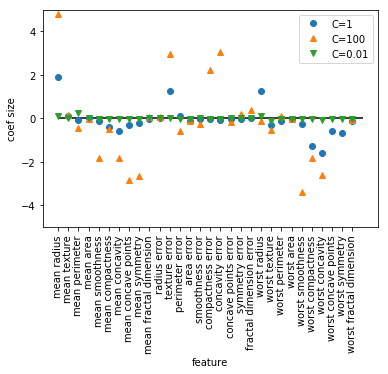

In [24]:
# 규제 매개변수 C 설정을 세 가지로 다르게 하여 학습시킨 모델의 계수를 확인

plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('feature')
plt.ylabel('coef size')
plt.legend()

### 다중 클래스 분류용 선형모델
이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 " 일대다 (one-vs.-rest) 방법 "

클래스의 수만큼 이진 분류 모델이 만들어짐

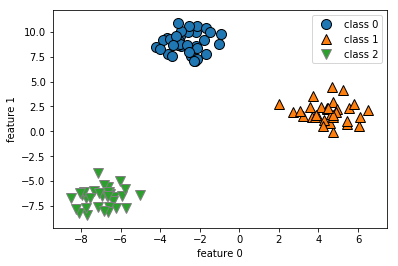

In [25]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

In [26]:
linear_svm = LinearSVC().fit(X,y)
print('계수 배열의 크기 :', linear_svm.coef_.shape)
print("절편 배열의 크기", linear_svm.intercept_.shape)


계수 배열의 크기 : (3, 2)
절편 배열의 크기 (3,)


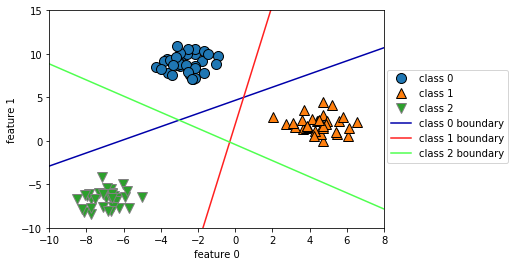

In [32]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc = (1.01, 0.3))

Text(0,0.5,'feature 1')

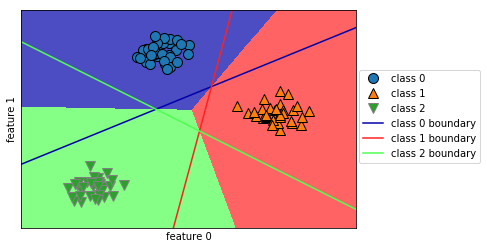

In [33]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc = (1.01, 0.3))
plt.xlabel('feature 0')
plt.ylabel('feature 1')

어느 곳에도 속하지 못한 영역은 가장 가까운 직선의 클래스가 된다.

#### 장단점과 매개변수
선형 모델의 주요 매개변수
 - 회귀모델 : alpha (값이 클수록 모델이 단순해짐)
 - LInearSVC, LogisticRegression에서는 C (C값이 작을수록 모델이 단순해짐)
보통 C와 alpha는 로그 스케일로 최적치를 정함. 그리고 L1규제(중요한 특성이 많지 않다고 생각되거나 모델의 해석이 중요한 요소일 때), L2규제(그렇지 않은 경우) 중 사용할 규제 방식을 정해야함

선형모델은 학습 속도와 예측이 빠르고 매우 크거나 희소한 데이터셋에서도 잘 작동함, 또한 예측 방식의 이해가 비교적 쉬움
  * 샘플에 비해 특성이 많을 때 잘 작동함
  * 계수의 값들이 왜 그런지 명확하지 않을 때가 있음 (특히 데이터셋의 특성들이 서로 깊게 연관되어 있을 때)

# 나이브 베이즈 분류기
선형 분류기보다 훈련 속도가 빠른 편이지만, 그 대신 일반화 성능이 조금 뒤짐

각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문에 효과적임

나이브 베이즈 분류기
 1. GaussianNB
     - 연속적인 어떤 데이터에도 적용 가능, 보통 매우 고차원적인 데이터셋에 사용
 2. BernoulliNB
     - 이진 데이터
 3. MultinomialNB
     - 카운트 데이터(정수 카운트), 보통 0이 아닌 특성이 비교적 많은 데이터셋에서 BernoulliNB보다 성능이 높음
- BernoulliNB, MultinomialNB는 대부분 텍스트 데이터를 분류할 때 사용